# WeatherPy


# Data Insights
1. In observing the scatterplot of latitude and maximum temperature from the weather data of the sample of cities selected, there is strong evidence that cities closer to the equator between the latitudes of -20 and 20 have the highest maximum temperatures in the sample.
2. In observing the scatterplot of latitude and percent of humidity from the weather data of the sample of cities selected, there is a higher density of cities across the latitudes of -20 to ~70 with humidity values between 60 and 100%.  
3. On the latitude versus wind speed scatterplot, it can be observed that the highest density of cities in the sample data lies between the latitudes of -40 and ~70 and has wind speeds between 0 and 10 mph.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#target url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

# Build partial query URL
    query_url = f"{url}APPID={api_key}&units={units}&q="
    
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temps.append(response["main"]["temp_max"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        wind_speeds.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(query_url + city)
       
        record= record + 1
        
        
    # If no record is found, "skip" to next call
    except:
        print("city not found")
  




Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=rikitea
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=jamestown
Processing Record 3 | Chuy
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=chuy
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=busselton
Processing Record 5 | Neka
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=neka
Processing Record 6 | Nome
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=nome
Processing Record 7 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696

Processing Record 58 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=puerto ayora
Processing Record 59 | Morondava
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=morondava
Processing Record 60 | Brae
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=brae
Processing Record 61 | Lasa
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=lasa
Processing Record 62 | Pangody
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=pangody
Processing Record 63 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=vestmannaeyjar
Processing Record 64 | Teya
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=t

Processing Record 115 | Cesis
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=cesis
Processing Record 116 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=antofagasta
city not found
Processing Record 117 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=saint anthony
city not found
Processing Record 118 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=tuatapere
Processing Record 119 | Keetmanshoop
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=keetmanshoop
Processing Record 120 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=komsomolskiy
Processing Record 121 | Gravdal
http://api.openweathermap.org/data/2.5/w

Processing Record 172 | Castro
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=castro
Processing Record 173 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=coquimbo
Processing Record 174 | Macherla
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=macherla
Processing Record 175 | Trat
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=trat
Processing Record 176 | Lima
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=lima
Processing Record 177 | Briancon
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=briancon
city not found
Processing Record 178 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial

Processing Record 229 | Sur
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=sur
Processing Record 230 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=umm lajj
Processing Record 231 | Big Rapids
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=big rapids
Processing Record 232 | Honiara
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=honiara
Processing Record 233 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=santa maria
Processing Record 234 | Kachug
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=kachug
Processing Record 235 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imper

Processing Record 285 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=kruisfontein
Processing Record 286 | Karasburg
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=karasburg
Processing Record 287 | Zelenogorskiy
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=zelenogorskiy
city not found
Processing Record 288 | Xingyi
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=xingyi
Processing Record 289 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=sao joao da barra
Processing Record 290 | Kununurra
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=kununurra
Processing Record 291 | Erdenet
http://api.openweathermap.org/data/2.5/weather?

Processing Record 342 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=ucluelet
Processing Record 343 | Caboolture
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=caboolture
city not found
Processing Record 344 | Dongkan
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=dongkan
Processing Record 345 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=winnemucca
Processing Record 346 | Nioaque
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=nioaque
Processing Record 347 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=ixtapa
Processing Record 348 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a9

Processing Record 397 | Magadan
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=magadan
Processing Record 398 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=meulaboh
city not found
city not found
Processing Record 399 | Berlevag
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=berlevag
Processing Record 400 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=nanortalik
Processing Record 401 | Baneh
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=baneh
Processing Record 402 | Tessalit
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=tessalit
Processing Record 403 | Djougou
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696

Processing Record 454 | Pisco
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=pisco
Processing Record 455 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=henties bay
city not found
Processing Record 456 | Teahupoo
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=teahupoo
Processing Record 457 | Pathein
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=pathein
Processing Record 458 | Batagay
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=batagay
Processing Record 459 | Fukue
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=fukue
Processing Record 460 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&uni

city not found
Processing Record 510 | Juneau
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=juneau
Processing Record 511 | Camacha
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=camacha
Processing Record 512 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=okhotsk
city not found
Processing Record 513 | Vanino
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=vanino
Processing Record 514 | Baker City
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=baker city
Processing Record 515 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef894696998c6b84a94f6&units=imperial&q=bandarbeyla
Processing Record 516 | Ende
http://api.openweathermap.org/data/2.5/weather?APPID=a964141d220ef8946969

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity":humidity,
    "Lat": lats,
    "Lng": lngs,
    "Max temp": max_temps,
    "Wind Speed":wind_speeds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max temp      545
Wind Speed    545
dtype: int64

In [25]:
weather_data.to_csv("../WeatherPy-homework/weather_data.csv")
weather_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
0,Rikitea,62,PF,1567699424,86,-23.12,-134.97,70.97,21.59
1,Jamestown,66,AU,1567699424,82,-33.21,138.60,45.23,13.15
2,Chuy,78,UY,1567699425,58,-33.69,-53.46,49.01,6.15
3,Busselton,0,AU,1567699425,62,-33.64,115.35,41.00,10.69
4,Neka,20,IR,1567699425,57,36.65,53.30,78.80,4.70
5,Nome,1,US,1567699425,55,30.04,-94.42,93.00,3.36
6,Punta Arenas,20,CL,1567699200,80,-53.16,-70.91,41.00,5.82
7,Tasiilaq,75,GL,1567699425,70,65.61,-37.64,46.40,8.05
8,Katsuura,75,JP,1567699259,88,33.93,134.50,78.80,8.05
9,Mujiayingzi,0,CN,1567699426,45,42.12,118.78,62.87,3.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

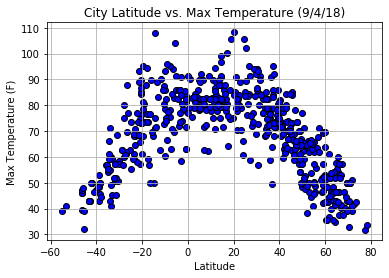

In [26]:
plt.scatter(weather_data["Lat"], weather_data["Max temp"], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature (9/4/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

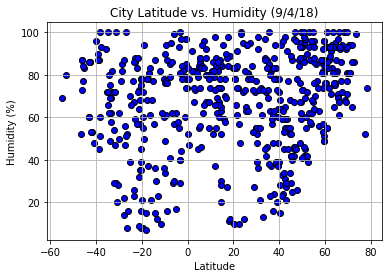

In [27]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Humidity (9/4/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

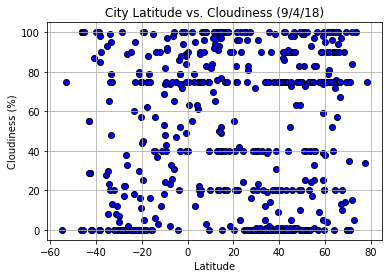

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (9/4/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

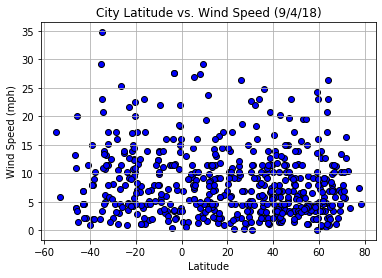

In [29]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed (9/4/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()